<a href="https://colab.research.google.com/github/xandie985/Time-Series-Forcasting/blob/main/S%26P%20500%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@sandeep.kumar
*   **Model trained on:** S&P 500 
*   **Duration:** 2000-2021
*   **Train:** 100% data
*   **Ratio predicted/Actual train data:** 0.9977507242337371

In [ ]:
 !pip install tsmoothie
 import seaborn as sns

In [ ]:
import numpy as np
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import tsmoothie
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from sklearn.decomposition import PCA
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

LSTM=tf.compat.v1.keras.layers.CuDNNLSTM 
a=tf.compat.v1.keras.layers.CuDNNLSTM
smoother=tsmoothie.KalmanSmoother(component='level_trend',  component_noise={'level':0.1, 'trend':0.1})

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_1=pd.read_csv("/content/drive/MyDrive/Proceedit/SPP-S&P500_2000-2021_HPN10PVCPCPR_CuDNNLSTM.csv")
data_1 = data_1[:-1]
print(data_1.columns)
data=data_1[['Open','High','Low','Close','Volume','HPN10PVCPCPR']]
dates=data_1[['Date']]

# normalising data

Open=MinMaxScaler()
High=MinMaxScaler()
Low=MinMaxScaler()
Close=MinMaxScaler()
Volume=MinMaxScaler()
HIghest=MinMaxScaler()

dataaa=np.zeros((data.shape),dtype=np.float64)
data['Open'] = data['Open'].str.replace(',','')
a=Open.fit_transform(data[['Open']])
dataaa[:,0] = a[:,0]
data['High'] = data['High'].str.replace(',','')
a=High.fit_transform(data[['High']])
dataaa[:,1] = a[:,0]
data['Low'] = data['Low'].str.replace(',','')
a=Low.fit_transform(data[['Low']])
dataaa[:,2] = a[:,0]
data['Close'] = data['Close'].str.replace(',','')
a=Close.fit_transform(data[['Close']])
dataaa[:,3] = a[:,0]
data['Volume'] = data['Volume'].str.replace(',','')
a=Volume.fit_transform(data[['Volume']])
dataaa[:,4] = a[:,0]
a=HIghest.fit_transform(data[['HPN10PVCPCPR']])
dataaa[:,5] = a[:,0]

a=dataaa[:,0]
smoother.smooth(a)
dataaa[:,0]=smoother.smooth_data

a=dataaa[:,1]
smoother.smooth(a)
dataaa[:,1]=smoother.smooth_data

a=dataaa[:,2]
smoother.smooth(a)
dataaa[:,2]=smoother.smooth_data

a=dataaa[:,3]
smoother.smooth(a)
dataaa[:,3]=smoother.smooth_data

a=dataaa[:,4]
smoother.smooth(a)
dataaa[:,4]=smoother.smooth_data

a=dataaa[:,5]
smoother.smooth(a)
dataaa[:,5]=smoother.smooth_data

full_data=dataaa

# finding total number of days

data=dataaa
total_days=data.shape[0]
print(total_days)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'HPN10PVCPCPR'], dtype='object')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

5456


In [ ]:
data_2 = data_1[['Open','High','Low','Close','Volume','HPN10PVCPCPR']]
path = './drive/MyDrive/Proceedit/'
# sns.pairplot(data_2, hue = 'HPN10PVCPCPR')

In [ ]:
training_period_dates=dates
#splitting training and testing data
total_days=data.shape[0]

timesteps=10

Train_data=data[:round(total_days*1),:]
print(Train_data.shape[0]," Days are used for Training")

# Function for ordering or making sequence of our test and train data according to date
def make_sequence(data,timesteps):
    X_train=[]
    Y_train=[]
    for i in range(len(data)-timesteps):
        X_train.append(data[i:(i+timesteps),:])
        Y_train.append(data[i+timesteps,5])
    return X_train,Y_train
X,Y=make_sequence(full_data,timesteps)
X,Y=np.array(X),np.array(Y)

Train_data,Train_Label=make_sequence(Train_data,timesteps)
Train_data,Train_Label=np.array(Train_data),np.array(Train_Label)
input_shape=((Train_data).shape[1],(Train_data).shape[2])

#model building
model=Sequential()

#adding layers to the model
model.add(LSTM(128,input_shape=input_shape,return_sequences=True))
model.add(LSTM(32,return_sequences = True))
model.add(LSTM(32))
model.add(Dense(64))
model.add(Dense(1))

#compiling model
lr=1e-3
model.compile(optimizer = optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')


5456  Days are used for Training


In [ ]:

#fitting model
history=model.fit(Train_data,Train_Label,batch_size=36,epochs=60)

In [ ]:
results = model.predict(Train_data)


In [ ]:
print(results)

[[0.1481788 ]
 [0.1550781 ]
 [0.1595425 ]
 ...
 [0.14254643]
 [0.14798205]
 [0.15417741]]


In [ ]:
print(np.mean(results), np.max(results), np.min(results))

0.21237248 0.79154146 0.113308564


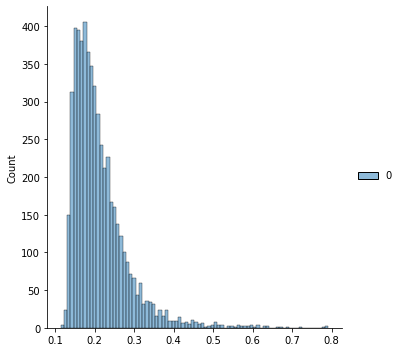

In [ ]:
sns.displot(results)

Highest and lowest extremes for the results obtained after inverse transformations:  0.99781096 1.1655068


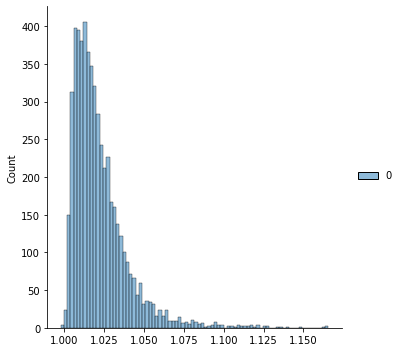

In [ ]:
prev_scaled_results = HIghest.inverse_transform(results)
print("Highest and lowest extremes for the results obtained after inverse transformations: ", np.min(prev_scaled_results), np.max(prev_scaled_results))
sns.displot(prev_scaled_results)

Highest and lowest extremes for the results obtained after StandardScaling transformations:  -1.3897687 8.125167


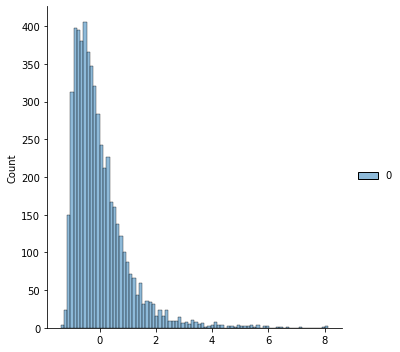

In [ ]:
transformedStandardScaled_results = StandardScaler().fit_transform(results)
print("Highest and lowest extremes for the results obtained after StandardScaling transformations: ", np.min(transformedStandardScaled_results), np.max(transformedStandardScaled_results))
sns.displot(transformedStandardScaled_results)

Highest and lowest extremes for the results obtained after minMax transformations:  0.98 1.0500001


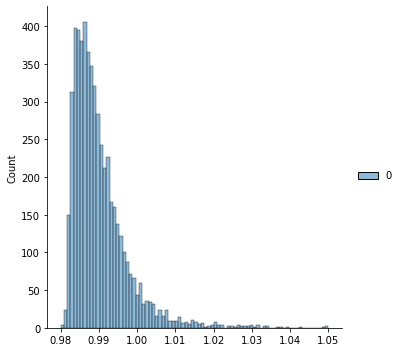

In [ ]:
minMaxScaled_results = MinMaxScaler(feature_range=(0.98,1.05)).fit_transform(results)
print("Highest and lowest extremes for the results obtained after minMax transformations: ",np.min(minMaxScaled_results),np.max(minMaxScaled_results))
sns.displot(minMaxScaled_results)

In [ ]:
np.savetxt(path+'2minMaxed30sept_SP500_2000-21_HPN10PVCPCPR_CuDNNLSTM_-0-S-K-36-60-0.001-10-1_SK.csv',minMaxScaled_results)

Highest and lowest extremes for the results obtained after minMax transformations:  0.99 1.05


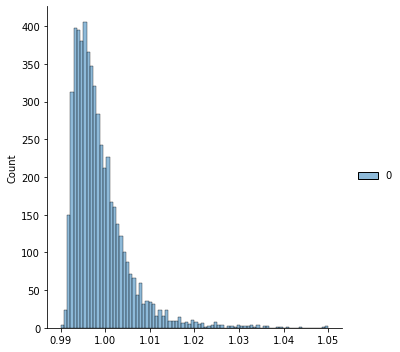

In [ ]:
minMaxScaled_results = MinMaxScaler(feature_range=(0.99,1.05)).fit_transform(results)
print("Highest and lowest extremes for the results obtained after minMax transformations: ",np.min(minMaxScaled_results),np.max(minMaxScaled_results))
sns.displot(minMaxScaled_results)

In [ ]:
np.savetxt(path+'2minMaxed.99_30sept_SP500_2000-21_HPN10PVCPCPR_CuDNNLSTM_-0-S-K-36-60-0.001-10-1_SK.csv',minMaxScaled_results)

In [ ]:
reshaped_trainLabels = Train_Label.reshape(-1,1)
reshaped_trainLabels

array([[0.15372276],
       [0.1541382 ],
       [0.16215727],
       ...,
       [0.13697058],
       [0.14284693],
       [0.14880199]])

In [ ]:
resultant_df = pd.DataFrame({'TrainLables': reshaped_trainLabels[:,0], 'Results':results[:,0]})

In [ ]:
resultant_df.head()

,TrainLables,Results
0,0.153723,0.148179
1,0.154138,0.155078
2,0.162157,0.159543
3,0.178605,0.173707
4,0.202003,0.196895


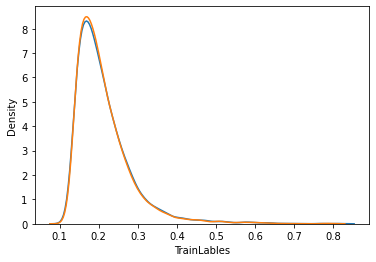

In [ ]:
sns.kdeplot(x = resultant_df['TrainLables'])
sns.kdeplot(x = resultant_df['Results'])

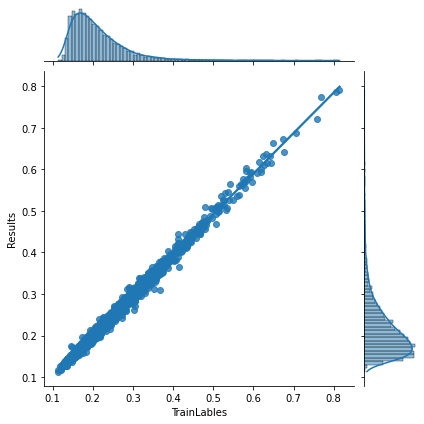

In [ ]:
sns.jointplot(x = 'TrainLables' , y = 'Results',data = resultant_df , kind = 'reg')
# scatter_kws

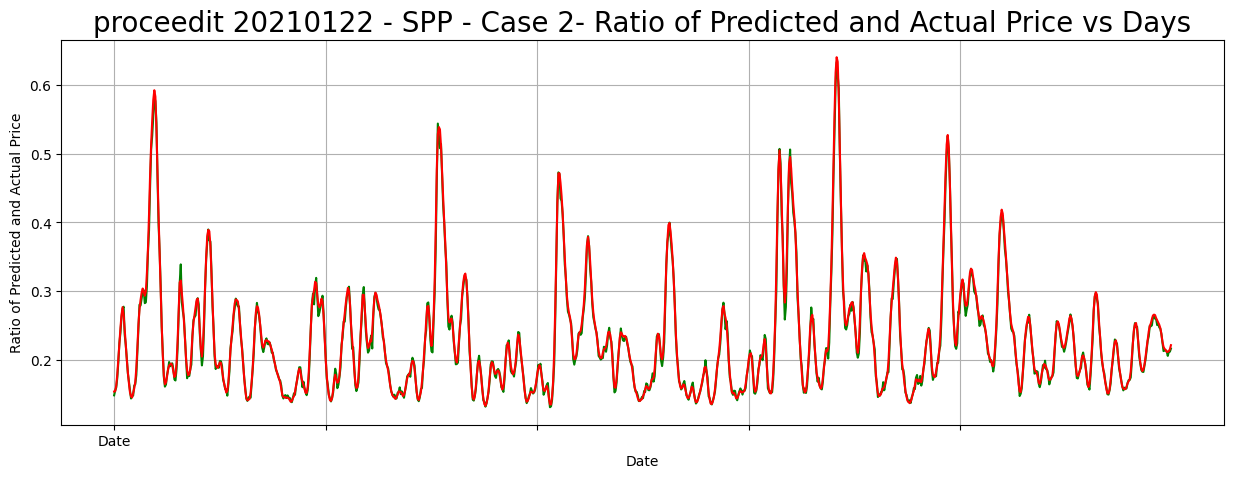

In [ ]:
# plotting ratio of Predicted vs Actual Price
plt.style.use('default')
plt.figure(figsize=(15,5))
plt.plot(results[:1000], 'g')
plt.plot(Train_Label[:1000],'r')
plt.xticks(range(0,1000,200),dates.loc[:200]) #dates.shape[0]
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Ratio of Predicted and Actual Price')
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.title('proceedit 20210122 - SPP - Case 2- Ratio of Predicted and Actual Price vs Days')
plt.style.use('default')

In [ ]:
np.savetxt(path+'2_SP500_2000-21_HPN10PVCPCPR_CuDNNLSTM-0-S-K-36-60-0.001-10-1_SK.csv',prev_scaled_results)

In [ ]:
np.savetxt(path+'2_SP500_2000-21_HPN10PVCPCPR_CuDNNLSTM-0-S-K-36-60-0.001-10-1_SK.csv',prev_scaled_results)

In [ ]:
model.save(path+'2_2000-21_HPN10PVCPCPR_CuDNNLSTM_-0-S-K-36-60-0.001-10-1_SK.h5')
np.savetxt(path+'2_2000-21_HPN10PVCPCPR_CuDNNLSTM_-0-S-K-36-60-0.001-10-1_SK.csv',results)


In [ ]:
path = './drive/MyDrive/Proceedit/'
model.load_weights(path+'S&P500_2021_HPN10PVCPCPR_CuDNNLSTM_model-10-S-K-36-60-0.001-10-1_SK.h5')

ValueError: ignored